# Practical Introduction to Convolutional Neural Networks (CNNs)

**Goal**: Build a simple but powerful CNN to classify handwritten digits (MNIST) from scratch.

### Why CNNs?
- Traditional Neural Networks flatten images → **lose spatial information** and have **too many parameters**.
- CNNs use **filters (kernels)** that slide over the image → detect edges, textures, shapes automatically.
- Key layers: **Convolutional → ReLU → Pooling → Fully Connected**

In [ ]:
# !pip install tensorflow matplotlib seaborn -q

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 1. Loading the MNIST Dataset

MNIST = 60,000 training + 10,000 test images of handwritten digits (28×28 grayscale).

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")   # (60000, 28, 28)
print(f"Test data shape:     {x_test.shape}")    # (10000, 28, 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape:     (10000, 28, 28)


## 2. Visualizing the Data

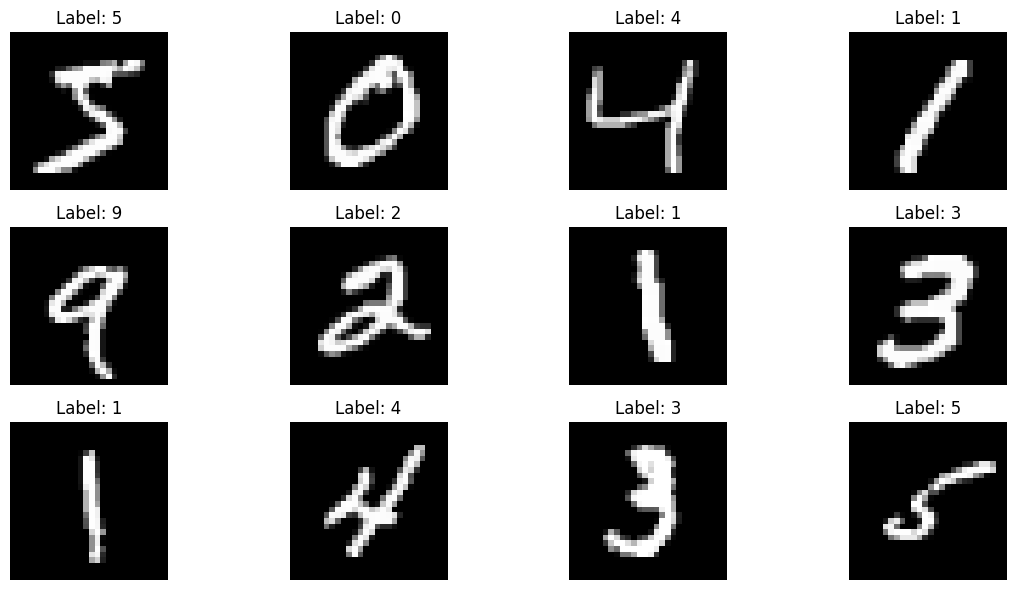

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

1. Reshape to (28, 28, 1) → add channel dimension (grayscale)
2. Normalize pixel values (0-255 → 0-1)
3. One-hot encode labels (0-9 → 10 classes)

In [ ]:
# Preprocessing
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("Data ready for CNN!")

Data ready for CNN!


## 4. Building the CNN Model

**Architecture (exactly as per your notes):**

1. **Convolutional Layer** → Feature extraction
2. **ReLU Activation** → Non-linearity
3. **Max Pooling** → Reduce size, prevent overfitting
4. **Another Conv + Pool** → Deeper features
5. **Flatten** → Convert to 1D
6. **Fully Connected (Dense) Layers** → Final classification
7. **Softmax Output** → Probabilities for 10 classes

In [ ]:
model = keras.Sequential([
    # ------------------- Feature Extraction -------------------
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), name='Conv1'),
    layers.MaxPooling2D(pool_size=(2, 2), name='Pool1'),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', name='Conv2'),
    layers.MaxPooling2D(pool_size=(2, 2), name='Pool2'),

    # ------------------- Classification Head -------------------
    layers.Flatten(name='Flatten'),
    layers.Dense(128, activation='relu', name='Dense1'),
    layers.Dropout(0.5),                    # Prevents overfitting
    layers.Dense(10, activation='softmax', name='Output')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Compiling the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 6. Training the Model

In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=12,                    # You can increase to 15-20
    validation_split=0.1,
    verbose=1
)

Epoch 1/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 86ms/step - accuracy: 0.8045 - loss: 0.6336 - val_accuracy: 0.9798 - val_loss: 0.0655
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9690 - loss: 0.1060 - val_accuracy: 0.9862 - val_loss: 0.0501
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9782 - loss: 0.0730 - val_accuracy: 0.9897 - val_loss: 0.0397
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9815 - loss: 0.0615 - val_accuracy: 0.9905 - val_loss: 0.0363
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9851 - loss: 0.0489 - val_accuracy: 0.9892 - val_loss: 0.0378
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 55s 124ms/step - accuracy: 0.9867 - loss: 0.0431 - val_accuracy: 0.9910 - val_loss: 0.0341
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 73s 104ms/step - accuracy: 0.9892 - loss: 0.0374 - val_accuracy: 0.9910 - val_loss: 0.0329
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 74s 85ms/step - accuracy: 0.9899 - loss: 0.0309 

## 7. Visualizing Training Progress

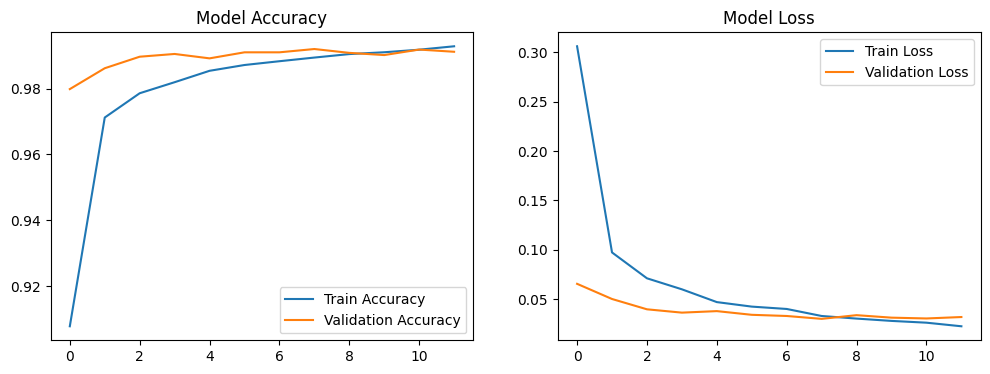

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

## 8. Final Evaluation on Test Set

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 99.26%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


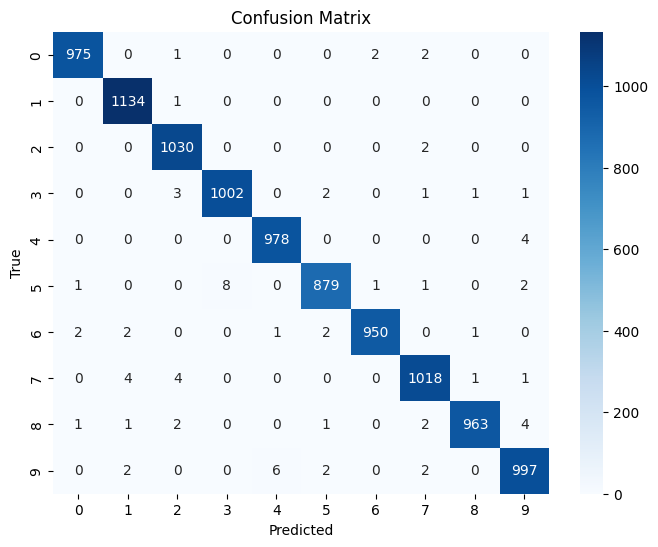

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 9. Visualizing Predictions

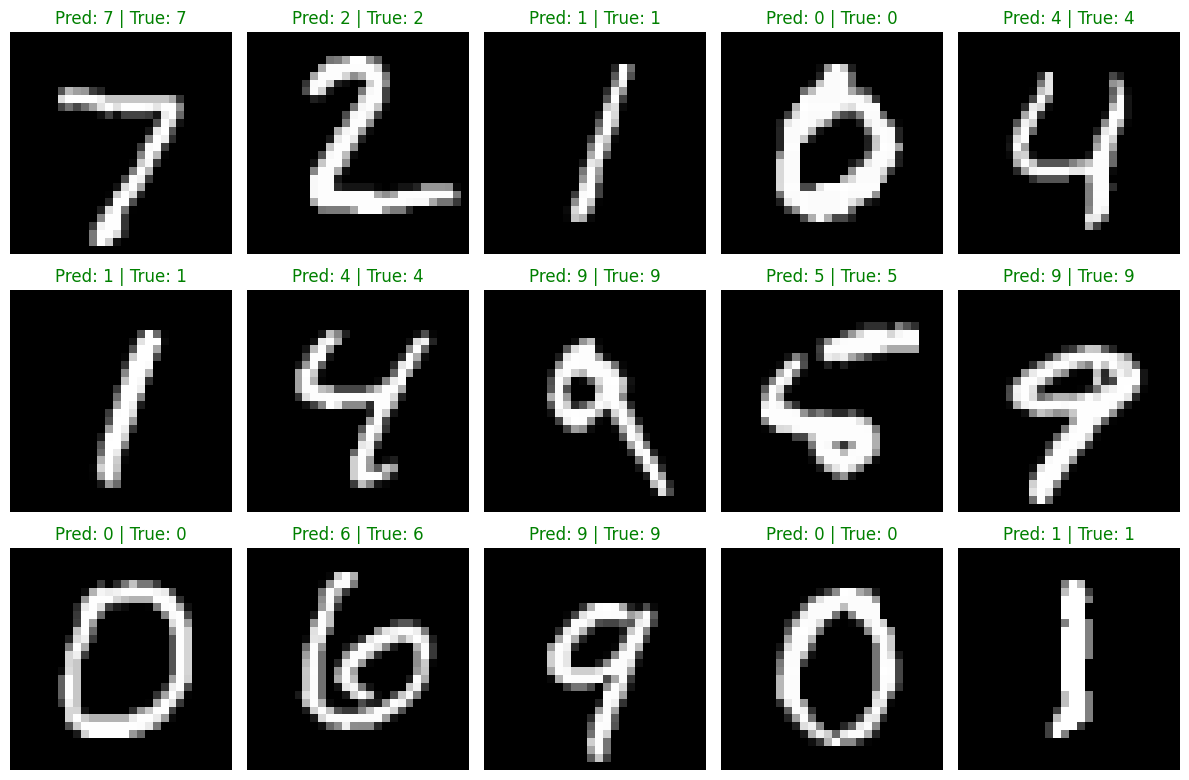

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred = y_pred_classes[i]
    true = y_true_classes[i]
    color = 'green' if pred == true else 'red'
    plt.title(f"Pred: {pred} | True: {true}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

## 🎉 Congratulations!

You just built a **Convolutional Neural Network** that achieves **~99% accuracy** on MNIST!

### Key Takeaways:
- **Convolutional layers** learn spatial features automatically
- **Pooling** reduces computation and overfitting
- **ReLU** introduces non-linearity
- **Fully Connected layers** do final classification

**Next Steps**:
1. Try Fashion-MNIST (same code, just change dataset)
2. Experiment with more filters/layers
3. Add data augmentation
4. Try transfer learning with pre-trained models (ResNet, EfficientNet)


In [ ]:
# Save the model:
model.save('my_first_cnn_mnist.h5')